<a href="https://colab.research.google.com/github/Yousufalipangat/EDA_Amazon_Top_50_Bestselling_Books/blob/main/EDA_Amazon_Top_50_Bestselling_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Top 50 Bestselling Books

## About Dataset


Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

**Data Fields:**

>Name - Name of the book.

>Author - Author of the book.

>User Rating - Cumulated User Ratings in a range between 0 - 5.

>Reviews - Total Number of reviews.

>Price - Price of the book.

>Year - The year in which book is best selling.

>Genre - Genre of book

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read the file and create dataframe
df = pd.read_csv('bestsellers with categories.csv')


In [3]:
#top 10 records
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
#bottom 10 records
df.tail(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [5]:
# undertand the default data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Let's check for duplicates

In [6]:
# check for any duplicate rows
df[df.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [90]:
df.select_dtypes('O').nunique()

Name      351
Author    248
Genre       2
dtype: int64

In [10]:
#check descriptive statistics of dataset
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


**1. How many records are in the dataset?**


In [12]:
len(df)

550

**2. What is the distribution of book genres?**

In [17]:
df[~df['Name'].duplicated()]['Genre'].value_counts()

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64


**3. Who are the top 5 authors with the most books in the dataset?**

In [39]:
df[~df['Name'].duplicated()]['Author'].value_counts().nlargest(5).reset_index().rename(columns = {'index':'Author','Author':'count'})


,Author,count
0,Jeff Kinney,12
1,Rick Riordan,10
2,Stephenie Meyer,7
3,Bill O'Reilly,6
4,Dav Pilkey,6


**4. What is the average rating of the books in the dataset?**

In [40]:
print('Average rating of the books in the dataset is ',df['User Rating'].mean())


Average rating of the books in the dataset is  4.618363636363637


**5. What is the average price of the books?**



<Axes: xlabel='Price'>

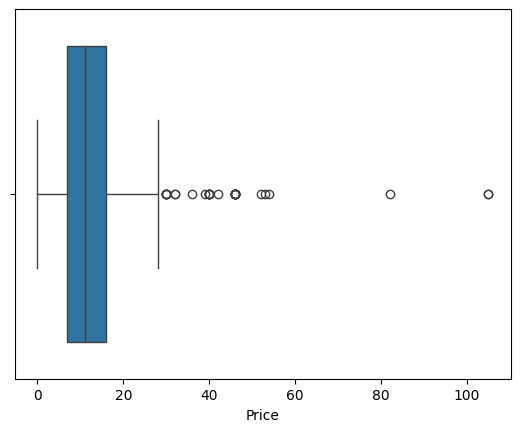

In [97]:
sns.boxplot(data = df, x = 'Price')

In [49]:
print('The average price of the books is with outliers' , df['Price'].mean())

The average price of the books is 13.1


<Axes: xlabel='Price'>

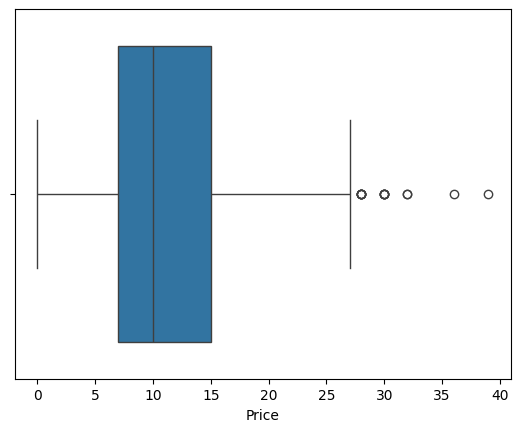

In [104]:
sns.boxplot(data = df[(df['Price'] > (df['Price'].quantile(0.25) - df['Price'].quantile(0.25)*1.5)) & (df['Price'] < (df['Price'].quantile(0.75) + df['Price'].quantile(0.75)*1.5)) ]
, x = 'Price')

In [102]:

print('The average price of the books is without outliers' ,
df[(df['Price'] > (df['Price'].quantile(0.25) - df['Price'].quantile(0.25)*1.5)) & (df['Price'] < (df['Price'].quantile(0.75) + df['Price'].quantile(0.75)*1.5)) ]['Price'].mean()
)


The average price of the books is without outliers 11.462121212121213



**6. What is the range of years in which the books were published?**


In [50]:
print('The range of years in which the books were published is ', df['Year'].min() , '-' , df['Year'].max())

The range of years in which the books were published is  2009 - 2019


**7. What are the top 5 most reviewed books?**

In [54]:
df[['Name','Reviews']].groupby('Name').mean().nlargest(5,'Reviews')

,Reviews
Name,
Where the Crawdads Sing,87841.0
The Girl on the Train,79446.0
Becoming,61133.0
Gone Girl,57271.0
The Fault in Our Stars,50482.0


**8. What is the distribution of book ratings?**

In [105]:
df[~df['Name'].duplicated()]['User Rating'].value_counts().reset_index().rename(columns= {'index':'User Rating','User Rating':'Counts'})

,User Rating,Counts
0,4.8,81
1,4.6,69
2,4.7,65
3,4.5,39
4,4.9,28
5,4.4,26
6,4.3,21
7,4.2,8
8,4.1,5
9,4.0,4


**9. How many books have a rating greater than 4.5?**

In [64]:
print('Number of books having ratings greater than 4.5 is ',(df[~df['Name'].duplicated()]['User Rating'] > 4.5).sum())

Number of books having ratings greater than 4.5 is  243


**10. What is the most common price range for books?**

In [68]:
print('Most common price range for books is ',
df['Price'].quantile(0.25),
      '-',
df['Price'].quantile(0.75))

Most common price range for books is  7.0 - 16.0


**11. What is the average number of reviews for books in each genre?**

In [79]:
df[['Name','Reviews','Genre']].groupby(['Genre','Name']).agg({'Reviews':'mean'}).groupby('Genre').agg({'Reviews':'mean'})

,Reviews
Genre,
Fiction,13111.068750
Non Fiction,7015.427076


**12. How does the average price vary across different genres?**

with outliers

In [80]:
df.groupby('Genre').agg({'Price':'mean'})

,Price
Genre,
Fiction,10.850000
Non Fiction,14.841935


without outliers

In [107]:
df_pwo = df[(df['Price'] > (df['Price'].quantile(0.25) - df['Price'].quantile(0.25)*1.5)) & (df['Price'] < (df['Price'].quantile(0.75) + df['Price'].quantile(0.75)*1.5)) ]
df_pwo.groupby('Genre').agg({'Price':'mean'})

,Price
Genre,
Fiction,10.244726
Non Fiction,12.453608


**13. What is the relationship between the number of reviews and the rating of books?**

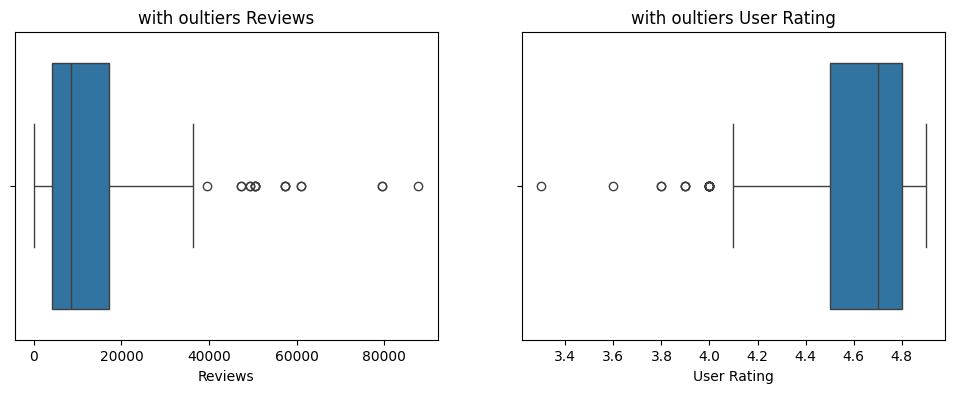

In [131]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data = df , x = 'Reviews',ax = ax[0])
ax[0].set_title('with oultiers Reviews')
sns.boxplot(data = df , x = 'User Rating' , ax= ax[1])
ax[1].set_title('with oultiers User Rating')

plt.show()

<ipython-input-132-074efbd0fb91>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rwo = df_rwo[(df['User Rating'] > (df_rwo['User Rating'].quantile(0.25) -df_rwo['User Rating'].quantile(0.25)*1.5)) & (df_rwo['User Rating'] < (df_rwo['User Rating'].quantile(0.75) + df_rwo['User Rating'].quantile(0.75)*1.5)) ]


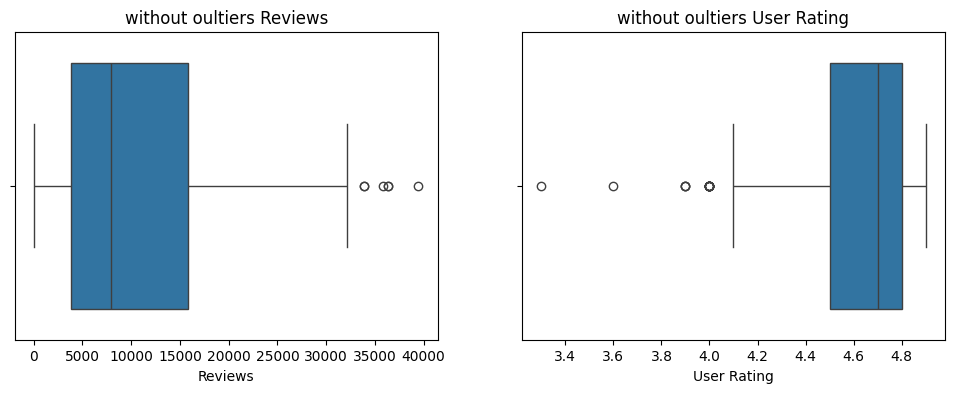

In [132]:
df_rwo = df[(df['Reviews'] > (df['Reviews'].quantile(0.25) - df['Reviews'].quantile(0.25)*1.5)) & (df['Reviews'] < (df['Reviews'].quantile(0.75) + df['Reviews'].quantile(0.75)*1.5)) ]
df_rwo = df_rwo[(df['User Rating'] > (df_rwo['User Rating'].quantile(0.25) -df_rwo['User Rating'].quantile(0.25)*1.5)) & (df_rwo['User Rating'] < (df_rwo['User Rating'].quantile(0.75) + df_rwo['User Rating'].quantile(0.75)*1.5)) ]

fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data = df_rwo , x = 'Reviews',ax = ax[0])
ax[0].set_title('without oultiers Reviews')
sns.boxplot(data = df_rwo , x = 'User Rating' , ax= ax[1])
ax[1].set_title('without oultiers User Rating')

plt.show()

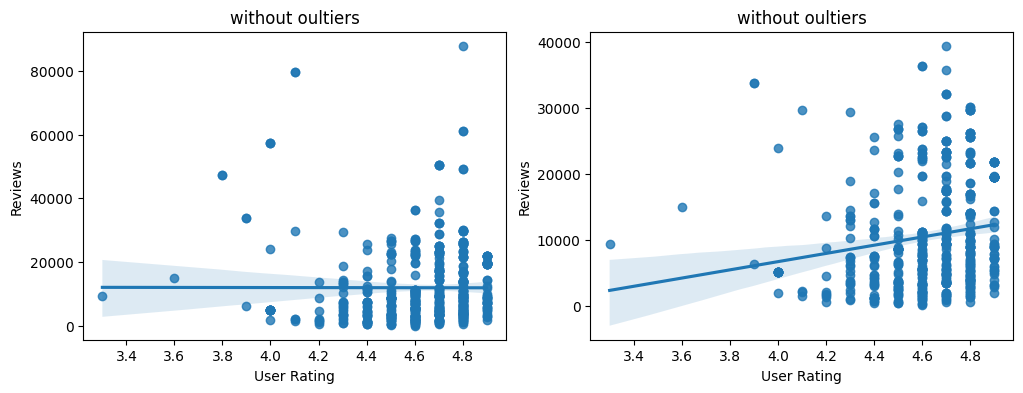

In [135]:
fig , ax = plt.subplots(1,2 , figsize=(12,4))
sns.regplot(data=df , x = 'User Rating' , y = 'Reviews', ax = ax[0] )
ax[0].set_title('without oultiers')
sns.regplot(data=df_rwo , x = 'User Rating' , y = 'Reviews', ax = ax[1])
ax[1].set_title('without oultiers')
plt.show()

There is very slight positive relation between reviews and user ratings after removing outliers where as the relation is neutral without removing outliers

**14. What are the top 5 books with the highest ratings and the highest number of reviews?**

In [86]:
df[~df['Name'].duplicated()].nlargest(5,['User Rating','Reviews'])

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction


**15. How has the number of bestseller books published per year changed over time?**

,bestseller_count
Year,
2009,21
2010,19
2011,20
2012,17
2013,21
2014,25
2015,30
2016,35
2017,29


<Axes: xlabel='Year', ylabel='bestseller_count'>

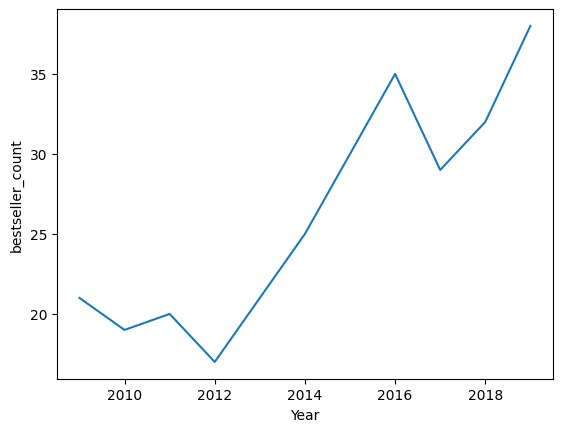

In [150]:
# best seller criteria
user_ratings_threshold = 4.6

chng_df = df[df['User Rating'] > user_ratings_threshold ].groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'bestseller_count'})
display(chng_df)
sns.lineplot(data = chng_df , x = 'Year' , y = 'bestseller_count' )